<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg8/Tassya_Salary_Data_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Tassya Ramadhanti**
# **NIM  : 1103204016**
# **Studying Support Vector Regression (SVR) using the "Salary_Data" dataset.**

# Pengambilan Data dari API Kaggle
---


Pastikan sudah menginstal pustaka Kaggle dengan menjalankan perintah seperti dibawah ini:

In [1]:
#Install modul kaggle
!pip install kaggle

Prompt ChatGPT:
berikan kodingan untuk mengimpor file kaggle.json ke google collab

In [2]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"0100ff86eefed89e942ccf669125b605"}'}

Prompt ChatGPT:
berikan codingan untuk membuat direktori kaggle kemudian pindahkan file kaggle.json yang sudah kita impor tadi kedalam direktori

In [3]:
# Membuat direktori Kaggle
!mkdir -p ~/.kaggle

# Pindahkan file kaggle.json ke direktori Kaggle
!mv kaggle.json ~/.kaggle/

In [4]:
# Mencari dataset yang tersedia di kaggle
!kaggle datasets list -s "Salary_Data"

ref                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
mohithsairamreddy/salary-data                    Salary_Data                                          17KB  2023-05-18 14:05:19          15535        273  0.88235295       
vihansp/salary-data                              Salary_data                                          378B  2018-01-04 19:15:53           7448         18  0.29411766       
harsh45/random-salary-data-of-employes-age-wise  salary_data of Employees with years of Experience    378B  2019-08-11 16:11:15           2500         25  0.64705884       
aytida23/salary-data                             salary_data                                          378B  2018-09-22 06:08:30        

Pilih dataset yang ingin digunakan dari list dataset yang tersedia diatas, kemudian download dataset

In [5]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download vihansp/salary-data --unzip

  0% 0.00/378 [00:00<?, ?B/s]
100% 378/378 [00:00<00:00, 1.07MB/s]


Dataset nantinya akan berada dalam direktori kaggle, seperti dibawah ini:

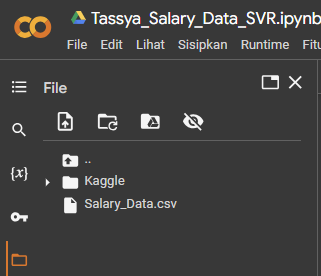

## Library Yang Digunakan
---

In [28]:
# Import library
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

fungsi dari setiap library:

1. **pandas (pd):** Pandas adalah library untuk manipulasi dan analisis data.

2. **numpy (np):** NumPy adalah library untuk komputasi numerik di Python.

3. **sklearn.svm (SVR):** Bagian dari scikit-learn (sklearn), modul ini menyediakan algoritma Support Vector Machines (SVM) untuk tugas-tugas regresi.

4. **matplotlib.pyplot (plt):** Matplotlib adalah library untuk visualisasi data di Python. `pyplot` adalah salah satu modul di Matplotlib yang memberikan antarmuka untuk membuat visualisasi grafik seperti plot garis, scatter plot, histogram, dan sebagainya.

5. **sklearn.model_selection (GridSearchCV, train_test_split):** `GridSearchCV` adalah alat untuk melakukan pencarian parameter terbaik untuk model Anda melalui grid search. `train_test_split` adalah fungsi yang membagi dataset menjadi data latih dan data uji.

6. **sklearn.metrics (mean_squared_error):** Modul ini menyediakan berbagai metrik evaluasi kinerja model, dan `mean_squared_error` adalah salah satu metrik yang mengukur seberapa baik model regresi memprediksi nilai dengan membandingkan nilai sebenarnya dan nilai yang diprediksi.

7. **sklearn.preprocessing (StandardScaler):** Modul ini menyediakan berbagai fungsi untuk pra-pemrosesan data. `StandardScaler` digunakan untuk melakukan standarisasi pada fitur-fitur, yaitu mengubah distribusi fitur sehingga memiliki nilai rata-rata 0 dan deviasi standar 1. Standarisasi ini dapat membantu model yang sensitif terhadap skala bekerja dengan lebih baik.

Prompt ChatGPT:
beri kode untuk membaca dataset menjadi dataframe

In [42]:
# memuat data
df = pd.read_csv("Salary_Data.csv")

# menampilkan 5 baris pertama dataset
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
#Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [31]:
# Menampilkan jumlah nilai yang hilang untuk setiap kolom
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Prompt ChatGPT: beri kode untuk melakukan SVR dengan target "Salary"

In [46]:
# Pisahkan fitur (X) dan target (y)
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVR dengan hyperparameter tertentu, disini saya menggunakan parameter C, gamma, dan kernel
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model SVR
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 574116457.7520595


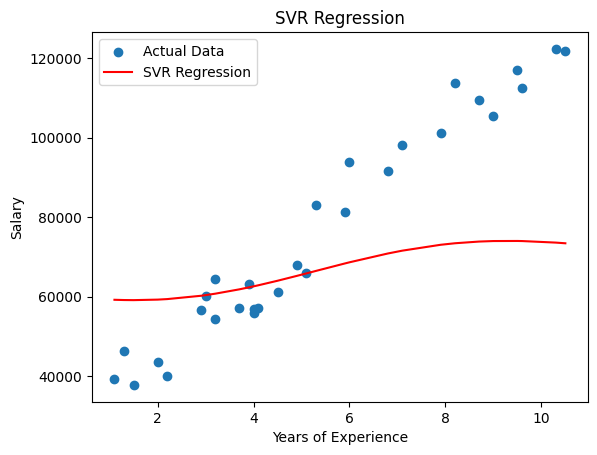

In [33]:
# Memvisualisasikan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [47]:
# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [100, 500, 1000, 5000, 10000, 50000, 100000],
    'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 100000, 'gamma': 0.05, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 45245096.376111336


Dalam kode di atas, fitur X_train atau 'YearsExperience' di-standarisasi menggunakan StandardScaler sebelum diterapkan pada model SVR. Standarisasi ini membantu model untuk lebih efektif belajar dari data dan meningkatkan interpretasi hasilnya.

Memiliki lebih banyak kombinasi hiperparameter pada param_grid dapat meningkatkan ruang pencarian dan membantu menemukan kombinasi hiperparameter yang memberikan performa terbaik akan tetapi semakin banyak waktu yang dibutuhkan untuk GridSearchCV, jadi pertimbangkan trade-off antara jumlah kombinasi dan waktu eksekusi.

In [48]:
model_baru = SVR(C=100000, gamma=0.05, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.05)

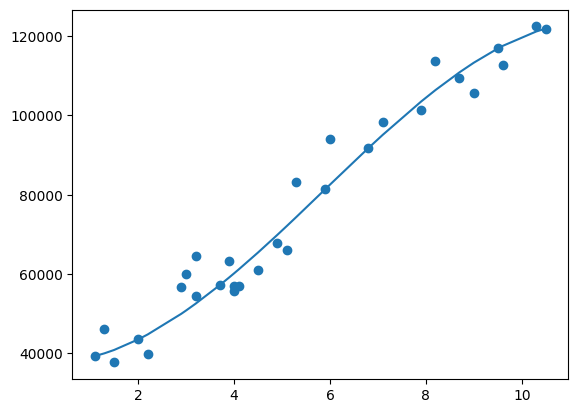

In [49]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))